<a href="https://colab.research.google.com/github/IsmaelMekene/meteor-object-detector/blob/main/datagenerator%26model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Beare in mind that the work on this notebook has be done on a dataset of only 500 raw images (due to a memory shortage)*  

## **1. Mount Drive into Colab**

In [7]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **2. Setup the Environment**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob2

import PIL
try:
    import Image
except ImportError:
    from PIL import Image
import cv2
from skimage import io, color

from tensorflow import keras
import tensorflow as tf 
tf.__version__

from keras.layers import *


## **3. Preprocessing before data generation**

In [6]:
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/east/fivehund/fivehund.csv') #Load the csv file containg the labels

,imageName,bbox,X1,Y1,X2,Y2,image_width,image_height
0,img_1,###,933,255,956,277,1280,720
1,img_1,###,172,323,195,339,1280,720
2,img_1,###,83,270,118,294,1280,720
3,img_1,###,940,310,962,320,1280,720
4,img_1,###,946,351,978,374,1280,720
...,...,...,...,...,...,...,...,...
5225,img_499,TURNING,347,236,395,261,1280,720
5226,img_499,INTO,397,231,425,252,1280,720
5227,img_499,ISTANA,342,256,382,280,1280,720
5228,img_499,DOMAIN,384,246,427,272,1280,720



### **a. Unzip the the dataset folders into colab** 


In [8]:
mkdir fivehund_images
#use '' when there is space in a folder name
! unzip '/content/drive/MyDrive/Colab Notebooks/east/fivehund/fivehund_images.zip' -d  /content/fivehund_images 

Archive:  /content/drive/MyDrive/Colab Notebooks/east/fivehund/fivehund_images.zip
  inflating: /content/fivehund_images/img_1.jpg  
  inflating: /content/fivehund_images/img_2.jpg  
  inflating: /content/fivehund_images/img_3.jpg  
  inflating: /content/fivehund_images/img_4.jpg  
  inflating: /content/fivehund_images/img_5.jpg  
  inflating: /content/fivehund_images/img_6.jpg  
  inflating: /content/fivehund_images/img_7.jpg  
  inflating: /content/fivehund_images/img_8.jpg  
  inflating: /content/fivehund_images/img_9.jpg  
  inflating: /content/fivehund_images/img_10.jpg  
  inflating: /content/fivehund_images/img_11.jpg  
  inflating: /content/fivehund_images/img_12.jpg  
  inflating: /content/fivehund_images/img_13.jpg  
  inflating: /content/fivehund_images/img_14.jpg  
  inflating: /content/fivehund_images/img_15.jpg  
  inflating: /content/fivehund_images/img_16.jpg  
  inflating: /content/fivehund_images/img_17.jpg  
  inflating: /content/fivehund_images/img_18.jpg  
  inflat

In [11]:
mkdir fivehund_masks
! unzip '/content/drive/MyDrive/Colab Notebooks/east/fivehund/fivehund_masks.zip' -d  /content/fivehund_masks 

Archive:  /content/drive/MyDrive/Colab Notebooks/east/fivehund/fivehund_masks.zip
  inflating: /content/fivehund_masks/fivehund_masks/img_1.jpg  
  inflating: /content/fivehund_masks/fivehund_masks/img_2.jpg  
  inflating: /content/fivehund_masks/fivehund_masks/img_3.jpg  
  inflating: /content/fivehund_masks/fivehund_masks/img_4.jpg  
  inflating: /content/fivehund_masks/fivehund_masks/img_5.jpg  
  inflating: /content/fivehund_masks/fivehund_masks/img_6.jpg  
  inflating: /content/fivehund_masks/fivehund_masks/img_7.jpg  
  inflating: /content/fivehund_masks/fivehund_masks/img_8.jpg  
  inflating: /content/fivehund_masks/fivehund_masks/img_9.jpg  
  inflating: /content/fivehund_masks/fivehund_masks/img_10.jpg  
  inflating: /content/fivehund_masks/fivehund_masks/img_11.jpg  
  inflating: /content/fivehund_masks/fivehund_masks/img_12.jpg  
  inflating: /content/fivehund_masks/fivehund_masks/img_13.jpg  
  inflating: /content/fivehund_masks/fivehund_masks/img_14.jpg  
  inflating: /con

In [12]:
mkdir fivehund_distancegeo
! unzip '/content/drive/MyDrive/Colab Notebooks/east/fivehund/fivehund_distancegeo.zip' -d  /content/fivehund_distancegeo 

Archive:  /content/drive/MyDrive/Colab Notebooks/east/fivehund/fivehund_distancegeo.zip
   creating: /content/fivehund_distancegeo/fivehund_distancegeo/
  inflating: /content/fivehund_distancegeo/fivehund_distancegeo/img_1.npy  
  inflating: /content/fivehund_distancegeo/fivehund_distancegeo/img_2.npy  
  inflating: /content/fivehund_distancegeo/fivehund_distancegeo/img_3.npy  
  inflating: /content/fivehund_distancegeo/fivehund_distancegeo/img_4.npy  
  inflating: /content/fivehund_distancegeo/fivehund_distancegeo/img_5.npy  
  inflating: /content/fivehund_distancegeo/fivehund_distancegeo/img_6.npy  
  inflating: /content/fivehund_distancegeo/fivehund_distancegeo/img_7.npy  
  inflating: /content/fivehund_distancegeo/fivehund_distancegeo/img_8.npy  
  inflating: /content/fivehund_distancegeo/fivehund_distancegeo/img_9.npy  
  inflating: /content/fivehund_distancegeo/fivehund_distancegeo/img_10.npy  
  inflating: /content/fivehund_distancegeo/fivehund_distancegeo/img_11.npy  
  inflati


*   ### **Resizing Images** 

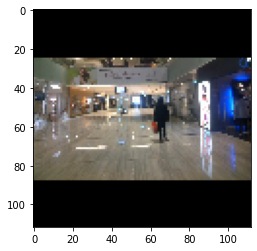

(112, 112, 3)


In [142]:
al = plt.imread('/content/fivehund_images/img_100.jpg')


w = al.shape[1]  #store the width
h = al.shape[0]  #store the height
c = al.shape[2]  #store the number of channels(3 in this case)

# In case image is horizontally orientated
if w > h:
  up = np.zeros((int((w-h)/2),w))
  down = np.zeros((int((w-h)/2),w))

  on_each_channel = []

  for i in range(c):
    caree = np.vstack((up,al[:,:,i],down))
    resized = cv2.resize(caree, (112, 112), interpolation=cv2.INTER_NEAREST)
    on_each_channel.append(resized)

  RESIZED = cv2.merge(on_each_channel)



# In case image is vertically orientated
elif w < h:
  left = np.zeros((h,int((h-w)/2)))
  right = np.zeros((h,int((h-w)/2)))

  on_each_channel = []

  for i in range(c):
    caree = np.vstack((left,al[:,:,i],right))
    resized = cv2.resize(caree, (112, 112), interpolation=cv2.INTER_NEAREST)
    on_each_channel.append(resized)

  RESIZED = cv2.merge(on_each_channel)


# In case image is squared
else:

  on_each_channel = []

  for i in range(c):
    caree = al[:,:,i]
    resized = cv2.resize(caree, (112, 112), interpolation=cv2.INTER_NEAREST)
    on_each_channel.append(resized)

  RESIZED = cv2.merge(on_each_channel)


al = RESIZED 

plt.imshow(al.astype(np.uint8))  # to Clip input data to the valid range for imshow with RGB data.
plt.show()
print(al.shape)











*   ### **Resizing Masks**

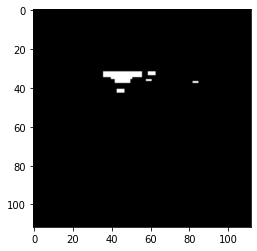

(112, 112, 3)


In [143]:
ali = plt.imread('/content/fivehund_masks/fivehund_masks/img_100.jpg')


w = ali.shape[1]  #store the width
h = ali.shape[0]  #store the height
c = ali.shape[2]  #store the number of channels(3 in this case)

# In case image is horizontally orientated
if w > h:
  up = np.zeros((int((w-h)/2),w))
  down = np.zeros((int((w-h)/2),w))

  on_each_channel = []

  for i in range(c):
    caree = np.vstack((up,ali[:,:,i],down))
    resized = cv2.resize(caree, (112, 112), interpolation=cv2.INTER_NEAREST)
    on_each_channel.append(resized)

  RESIZED = cv2.merge(on_each_channel)



# In case image is vertically orientated
elif w < h:
  left = np.zeros((h,int((h-w)/2)))
  right = np.zeros((h,int((h-w)/2)))

  on_each_channel = []

  for i in range(c):
    caree = np.vstack((left,ali[:,:,i],right))
    resized = cv2.resize(caree, (112, 112), interpolation=cv2.INTER_NEAREST)
    on_each_channel.append(resized)

  RESIZED = cv2.merge(on_each_channel)


# In case image is squared
else:

  on_each_channel = []

  for i in range(c):
    caree = ali[:,:,i]
    resized = cv2.resize(caree, (112, 112), interpolation=cv2.INTER_NEAREST)
    on_each_channel.append(resized)

  RESIZED = cv2.merge(on_each_channel)


ali = RESIZED 

plt.imshow((ali*255).astype(np.uint8))  # to Clip input data to the valid range for imshow with RGB data.
plt.show()
print(ali.shape)










*   ### **Resizing Distancegeo**

(112, 112, 4)


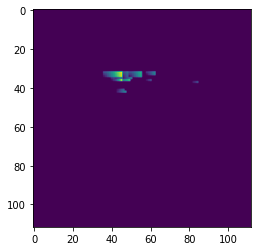

(112, 112)


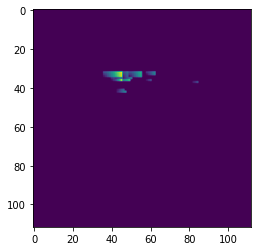

(112, 112)


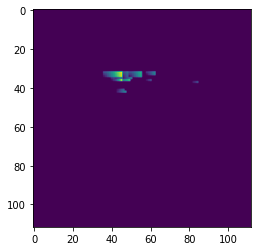

(112, 112)


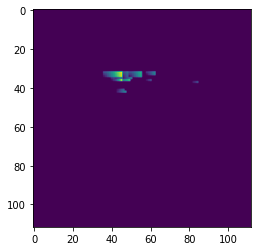

(112, 112)


In [144]:
ale = np.load('/content/fivehund_distancegeo/fivehund_distancegeo/img_100.npy')


w = ale.shape[1]  #store the width
h = ale.shape[0]  #store the height
c = ale.shape[2]  #store the number of channels(3 in this case)

# In case image is horizontally orientated
if w > h:
  up = np.zeros((int((w-h)/2),w))
  down = np.zeros((int((w-h)/2),w))

  on_each_channel = []

  for i in range(c):
    caree = np.vstack((up,ale[:,:,i],down))
    resized = cv2.resize(caree, (112, 112), interpolation=cv2.INTER_NEAREST)
    on_each_channel.append(resized)

  RESIZED = cv2.merge(on_each_channel)



# In case image is vertically orientated
elif w < h:
  left = np.zeros((h,int((h-w)/2)))
  right = np.zeros((h,int((h-w)/2)))

  on_each_channel = []

  for i in range(c):
    caree = np.vstack((left,ale[:,:,i],right))
    resized = cv2.resize(caree, (112, 112), interpolation=cv2.INTER_NEAREST)
    on_each_channel.append(resized)

  RESIZED = cv2.merge(on_each_channel)


# In case image is squared
else:

  on_each_channel = []

  for i in range(c):
    caree = ale[:,:,i]
    resized = cv2.resize(caree, (112, 112), interpolation=cv2.INTER_NEAREST)
    on_each_channel.append(resized)

  RESIZED = cv2.merge(on_each_channel)


ale = RESIZED 

#plt.imshow(al.astype(np.uint8))  # to Clip input data to the valid range for imshow with RGB data.
#plt.show()

print(ale.shape)

for el in range(c):

  plt.imshow(ale[:,:,i])
  plt.show()
  print(ale[:,:,i].shape)









## **b. Generation of a DataFrame of 3 columns and length of the dataset that contains the names of the corresponding datatype**

In [14]:
def processdata(dataset_name):

  ''' This function aims to create a dataframe that stored the name, mask and distancegeo for each image'''

  #store into lists the names, masks and distancegeo
  list_of_images = glob2.glob(f'/content/{dataset_name}_images/*.jpg')
  list_of_masks = glob2.glob(f'/content/{dataset_name}_masks/{dataset_name}_masks/*.jpg')
  list_of_distancegeo = glob2.glob(f'/content/{dataset_name}_distancegeo/{dataset_name}_distancegeo/*.npy')

  #make a flatten list
  raw_lists = [list_of_images, list_of_masks, list_of_distancegeo]

  #sort the values by ascending order
  sorted_list_of_images, sorted_list_of_masks, sorted_list_of_distancegeo = [sorted(x) for x in raw_lists]

  #store lists into dataframes
  frame_images = pd.DataFrame(sorted_list_of_images, columns=['names']).sort_values(by=['names'], ascending=True).reset_index(drop=True)
  frame_masks = pd.DataFrame(sorted_list_of_masks, columns=['masks']).sort_values(by=['masks'], ascending=True).reset_index(drop=True)
  frame_distancegeo = pd.DataFrame(sorted_list_of_distancegeo, columns=['distancegeo']).sort_values(by=['distancegeo'], ascending=True).reset_index(drop=True)

  #concatenate dataframes
  df = pd.concat([frame_images, frame_masks, frame_distancegeo], axis=1)
  df.to_csv(r'./df_fivehund.csv', index = False)
  
  return df 



In [15]:
def main():
    processdata('fivehund')
    
if __name__ == "__main__":
    main()

In [12]:
myframe = pd.read_csv('df_fivehund.csv')  #save the dataframe as a csv file


In [13]:
myframe  #view the dataframe

,names,masks,distancegeo
0,/content/fivehund_images/img_1.jpg,/content/fivehund_masks/fivehund_masks/img_1.jpg,/content/fivehund_distancegeo/fivehund_distanc...
1,/content/fivehund_images/img_10.jpg,/content/fivehund_masks/fivehund_masks/img_10.jpg,/content/fivehund_distancegeo/fivehund_distanc...
2,/content/fivehund_images/img_100.jpg,/content/fivehund_masks/fivehund_masks/img_100...,/content/fivehund_distancegeo/fivehund_distanc...
3,/content/fivehund_images/img_101.jpg,/content/fivehund_masks/fivehund_masks/img_101...,/content/fivehund_distancegeo/fivehund_distanc...
4,/content/fivehund_images/img_102.jpg,/content/fivehund_masks/fivehund_masks/img_102...,/content/fivehund_distancegeo/fivehund_distanc...
...,...,...,...
495,/content/fivehund_images/img_95.jpg,/content/fivehund_masks/fivehund_masks/img_95.jpg,/content/fivehund_distancegeo/fivehund_distanc...
496,/content/fivehund_images/img_96.jpg,/content/fivehund_masks/fivehund_masks/img_96.jpg,/content/fivehund_distancegeo/fivehund_distanc...
497,/content/fivehund_images/img_97.jpg,/content/fivehund_masks/fivehund_masks/img_97.jpg,/content/fivehund_distancegeo/fivehund_distanc...
498,/content/fivehund_images/img_98.jpg,/content/fivehund_masks/fivehund_masks/img_98.jpg,/content/fivehund_distancegeo/fivehund_distanc...


In [14]:
ls

df_fivehund.csv  fivehund_distancegeo/  fivehund_masks/  sample_data/
drive/           fivehund_images/       model.png


# **4. Data Generator**

## **a. Build the Data Generator**

In [15]:

#myframe = pd.read_csv('the 3 columns dataframe containing the names of each files (1: images, 2: masks, 3: distancedeo)')




class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'

    
        #'Initialization'
    
    def __init__(self, batch_size, df, input_size = 224, shuffle=True):

      self.batch_size = batch_size
      self.df = df
      self.shuffle = shuffle  #NOTE that the SHUFFLE is at the beginning of each epoch!!!
      self.input_size = input_size



    def name_generation(self, dataframe, batch_size):
      'Generates data names following batch_size samples'

      #k = 19
      n_batch = batch_size
      for k in range(int(len(dataframe)/batch_size)):

        
        boom = dataframe.iloc[k*n_batch:(k+1)*n_batch, :]

        pure_images = []
        pure_masks = []
        pure_distancegeo = []

        X = np.empty((batch_size, self.input_size, self.input_size, 3))

        for j, pure in enumerate (boom['names']):

        #resizing the images

          al = plt.imread(pure)


          w = al.shape[1]  #store the width
          h = al.shape[0]  #store the height
          c = al.shape[2]  #store the number of channels(3 in this case)

          # In case image is horizontally orientated
          if w > h:
            up = np.zeros((int((w-h)/2),w))
            down = np.zeros((int((w-h)/2),w))

            on_each_channel = []

            for i in range(c):
              #for each iteration, do the ideal padding and the resize
              caree = np.vstack((up,al[:,:,i],down))
              resized = cv2.resize(caree, (self.input_size, self.input_size), interpolation=cv2.INTER_NEAREST)
              on_each_channel.append(resized)

            RESIZED_images = cv2.merge(on_each_channel) #merge into the same tensor



          # In case image is vertically orientated
          elif w < h:
            left = np.zeros((h,int((h-w)/2)))
            right = np.zeros((h,int((h-w)/2)))

            on_each_channel = []

            for i in range(c):
              #for each iteration, do the ideal padding and the resize
              caree = np.vstack((left,al[:,:,i],right))
              resized = cv2.resize(caree, (self.input_size, self.input_size), interpolation=cv2.INTER_NEAREST)
              on_each_channel.append(resized)

            RESIZED_images = cv2.merge(on_each_channel)  #merge into the same tensor


          # In case image is squared
          else:

            on_each_channel = []

            for i in range(c):
              #for each iteration, do the resize
              caree = al[:,:,i]
              resized = cv2.resize(caree, (self.input_size, self.input_size), interpolation=cv2.INTER_NEAREST)
              on_each_channel.append(resized)

            RESIZED_images = cv2.merge(on_each_channel)  #merge into the same tensor


          al = RESIZED_images 

          #pure_images.append(al)
          X[j] = al


        Y_1 = np.empty((batch_size, int(self.input_size/2), int(self.input_size/2), 1))
        for zk, mask in enumerate (boom['masks']):

          ali = plt.imread(mask)


          w = ali.shape[1]  #store the width
          h = ali.shape[0]  #store the height
          c = ali.shape[2]  #store the number of channels(3 in this case)

          # In case image is horizontally orientated
          if w > h:
            up = np.zeros((int((w-h)/2),w))
            down = np.zeros((int((w-h)/2),w))

            on_each_channel = []

            for i in range(c):
              #for each iteration, do the ideal padding and the resize
              caree = np.vstack((up,ali[:,:,i],down))
              resized = cv2.resize(caree, (int(self.input_size/2), int(self.input_size/2)), 
                                   interpolation=cv2.INTER_NEAREST)
              on_each_channel.append(resized)

            RESIZED_masks = cv2.merge(on_each_channel)[:,:,0] #merge into the same tensor
            RESIZED_masks = np.expand_dims(RESIZED_masks, axis=-1)



          # In case image is vertically orientated
          elif w < h:
            left = np.zeros((h,int((h-w)/2)))
            right = np.zeros((h,int((h-w)/2)))

            on_each_channel = []

            for i in range(c):
              #for each iteration, do the ideal padding and the resize
              caree = np.vstack((left,ali[:,:,i],right))
              resized = cv2.resize(caree, (int(self.input_size/2), int(self.input_size/2)),
                                   interpolation=cv2.INTER_NEAREST)
              on_each_channel.append(resized)

            RESIZED_masks = cv2.merge(on_each_channel)[:,:,0] #merge into the same tensor
            RESIZED_masks = np.expand_dims(RESIZED_masks, axis=-1)


          # In case image is squared
          else:

            on_each_channel = []

            for i in range(c):
              #for each iteration, do the resize
              caree = ali[:,:,i]
              resized = cv2.resize(caree, (int(self.input_size/2), int(self.input_size/2)), 
                                   interpolation=cv2.INTER_NEAREST)
              on_each_channel.append(resized)

            RESIZED_masks = cv2.merge(on_each_channel)[:,:,0]  #merge into the same tensor
            RESIZED_masks = np.expand_dims(RESIZED_masks, axis=-1)


          ali = RESIZED_masks 
          #pure_masks.append(ali)
          Y_1[zk] = ali



        Y_2 = np.empty((batch_size, int(self.input_size/2), int(self.input_size/2), 4))
        for zi, distance in enumerate (boom['distancegeo']):

          ale = np.load(distance)


          w = ale.shape[1]  #store the width
          h = ale.shape[0]  #store the height
          c = ale.shape[2]  #store the number of channels(3 in this case)

          # In case image is horizontally orientated
          if w > h:
            up = np.zeros((int((w-h)/2),w))
            down = np.zeros((int((w-h)/2),w))

            on_each_channel = []

            for i in range(c):
              #for each iteration, do the ideal padding and the resize
              caree = np.vstack((up,ale[:,:,i],down))
              resized = cv2.resize(caree, (int(self.input_size/2), int(self.input_size/2)),
                                   interpolation=cv2.INTER_NEAREST)
              on_each_channel.append(resized)

            RESIZED_distancegeo = cv2.merge(on_each_channel)  #merge them into the same tensor



          # In case image is vertically orientated
          elif w < h:
            left = np.zeros((h,int((h-w)/2)))
            right = np.zeros((h,int((h-w)/2)))

            on_each_channel = []

            for i in range(c):
              #for each iteration, do the ideal padding and the resize
              caree = np.vstack((left,ale[:,:,i],right))
              resized = cv2.resize(caree, (int(self.input_size/2), int(self.input_size/2)), 
                                   interpolation=cv2.INTER_NEAREST)
              on_each_channel.append(resized)

            RESIZED_distancegeo = cv2.merge(on_each_channel)  #mergen them into the same tensor


          # In case image is squared
          else:

            on_each_channel = [] 

            for i in range(c):
              #for each iteration, do the resize
              caree = ale[:,:,i]
              resized = cv2.resize(caree, (int(self.input_size/2), int(self.input_size/2)), 
                                   interpolation=cv2.INTER_NEAREST)
              on_each_channel.append(resized)

            RESIZED_distancegeo = cv2.merge(on_each_channel)  #merge them into the same tensor


          ale = RESIZED_distancegeo 
          #pure_distancegeo.append(ale)  # add to the list of distancegeo
          Y_2[zi] = ale

        


        #les_y = []  #empty list
        #les_y.append(pure_masks)  #add the list of masks 
        #les_y.append(pure_distancegeo)  # add the list of distancegeo

        list_de_sortie = []  #empty list
        list_de_sortie.append(X)  #add the list of images
        list_de_sortie.append(Y_1)   #add the list of the y
        list_de_sortie.append(Y_2)        

        yield list_de_sortie   #yield this list of two lists
        #return list_de_sortie   #return this list of two lists







 

## **b. Run the datagenerator for a single batch**

In [16]:
meteor = DataGenerator(batch_size=10, df=myframe)
myGen = meteor.name_generation(myframe,10)

for el in myGen:
  print(len(el))
  print(el[0].shape, el[1].shape, el[2].shape )
  break

3
(10, 224, 224, 3) (10, 112, 112, 1) (10, 112, 112, 4)


### **c. Store a batch for the model testing** 

In [17]:
meteor = DataGenerator(batch_size=10, df=myframe)  #in order to restart the regeneration process 
myGen = meteor.name_generation(myframe,10)
batch_test = next(myGen)  #generate the next batch 


# **5. The Model**

## **a. Load a ResNet101V2 model from keras**

In [81]:
#load a ResNet101V2 model
meteor2_resnet101v2 = tf.keras.applications.ResNet101V2(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000,
    classifier_activation='softmax'
)

In [82]:
#View the summary
meteor2_resnet101v2.summary()

Model: "resnet101v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
________________________________________________________________________________________

## Visualize the input and the output of the model 

In [84]:
#visualise the input
meteor2_resnet101v2.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>

In [85]:
#visualise the output
meteor2_resnet101v2.output

<KerasTensor: shape=(None, 1000) dtype=float32 (created by layer 'predictions')>

## **b. Access some layers and visualize their input and output**

In [145]:
#access a given layer of the model 'conv2_block2_out'
layer_conv2_block2_out = meteor2_resnet101v2.get_layer('conv2_block2_out')

In [86]:
#visualise the input and output of layer 'conv1_conv'

In [87]:
meteor2_resnet101v2.get_layer('conv1_conv').input

<KerasTensor: shape=(None, 230, 230, 3) dtype=float32 (created by layer 'conv1_pad')>

In [88]:
meteor2_resnet101v2.get_layer('conv1_conv').output

<KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'conv1_conv')>

In [89]:
#visualise the input and output of layer 'conv2_block3_1_relu'

In [90]:
meteor2_resnet101v2.get_layer('conv2_block3_1_relu').input

<KerasTensor: shape=(None, 56, 56, 64) dtype=float32 (created by layer 'conv2_block3_1_bn')>

In [91]:
meteor2_resnet101v2.get_layer('conv2_block3_1_relu').output

<KerasTensor: shape=(None, 56, 56, 64) dtype=float32 (created by layer 'conv2_block3_1_relu')>

In [92]:
#visualise the input and output of layer 'conv3_block4_1_relu '

In [93]:
meteor2_resnet101v2.get_layer('conv3_block4_1_relu').input

<KerasTensor: shape=(None, 28, 28, 128) dtype=float32 (created by layer 'conv3_block4_1_bn')>

In [94]:
meteor2_resnet101v2.get_layer('conv3_block4_1_relu').output

<KerasTensor: shape=(None, 28, 28, 128) dtype=float32 (created by layer 'conv3_block4_1_relu')>

In [95]:
#visualise the input and output of layer 'conv4_block23_1_relu ' conv4_block23_1_relu 

In [96]:
meteor2_resnet101v2.get_layer('conv4_block23_1_relu').input

<KerasTensor: shape=(None, 14, 14, 256) dtype=float32 (created by layer 'conv4_block23_1_bn')>

In [97]:
meteor2_resnet101v2.get_layer('conv4_block23_1_relu').output

<KerasTensor: shape=(None, 14, 14, 256) dtype=float32 (created by layer 'conv4_block23_1_relu')>

In [98]:
#visualise the input and output of layer 'conv5_block3_2_relu'conv5_block3_2_relu 

In [99]:
meteor2_resnet101v2.get_layer('conv5_block3_2_relu').input

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'conv5_block3_2_bn')>

In [100]:
meteor2_resnet101v2.get_layer('conv5_block3_2_relu').output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'conv5_block3_2_relu')>

## **c. Select the needed layers of ResNet101 for our case**

In [101]:
# rearrange the model by selecting the needed layers.
meteor_model = tf.keras.Model(inputs=meteor2_resnet101v2.input, outputs=[meteor2_resnet101v2.get_layer('conv1_conv').output, 
                                                                  meteor2_resnet101v2.get_layer('conv2_block3_1_relu').output,
                                                                  meteor2_resnet101v2.get_layer('conv3_block4_1_relu').output,
                                                                  meteor2_resnet101v2.get_layer('conv4_block23_1_relu').output,
                                                                  meteor2_resnet101v2.get_layer('conv5_block3_2_relu').output])


In [102]:
meteor_model.summary()  #visualize the summary of this model 

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

## **d. Store the needed layers in variables according the EAST paper**

In [103]:
f1 = meteor2_resnet101v2.get_layer('conv5_block3_2_relu').output  #f1 according to EAST paper
f2 = meteor2_resnet101v2.get_layer('conv4_block23_1_relu').output  #f2 according to EAST paper
f3 = meteor2_resnet101v2.get_layer('conv3_block4_1_relu').output  #f3 according to EAST paper
f4 = meteor2_resnet101v2.get_layer('conv2_block3_1_relu').output  #f4 according to EAST paper
f5 = meteor2_resnet101v2.get_layer('conv1_conv').output  #f5 according to EAST paper

## **e. Follow the steps according the EAST paper**

*   ### **First green block (h1 ---> h2)**

In [105]:
unpool_h1 = UpSampling2D(size=(2, 2), interpolation="nearest")(f1) #unpool the layer in order to make concatenation possible
concat_h1_f2 = Concatenate()([unpool_h1, f2])  #concatenate with the f2 layer
conv1vs1_in_h1 = tf.keras.layers.Conv2D(filters = 128, kernel_size = 1, padding="same", activation="relu")(concat_h1_f2)  #make a (1×1) 2D convolution
conv3vs3_in_h1 = tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding="same", activation="relu")(conv1vs1_in_h1) #make a (3×3) 2D convolution

*   ### **Second green block (h2 ---> h3)**

In [106]:
unpool_h2 = UpSampling2D(size=(2, 2), interpolation="nearest")(conv3vs3_in_h1) #unpool the layer in order to make concatenation possible
concat_h2_f3 = Concatenate()([unpool_h2, f3])  #concatenate with the f3 layer
conv1vs1_in_h2 = tf.keras.layers.Conv2D(filters = 64, kernel_size = 1, padding="same", activation="relu")(concat_h2_f3)  #make a (1×1) 2D convolution
conv3vs3_in_h2 = tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding="same", activation="relu")(conv1vs1_in_h2) #make a (3×3) 2D convolution

*   ### **Third green block (h3 ---> h4)**

In [107]:
unpool_h3 = UpSampling2D(size=(2, 2), interpolation="nearest")(conv3vs3_in_h2) #unpool the layer in order to make concatenation possible
concat_h3_f4 = Concatenate()([unpool_h3, f4])  #concatenate with the f3 layer
conv1vs1_in_h3 = tf.keras.layers.Conv2D(filters = 32, kernel_size = 1, padding="same", activation="relu")(concat_h3_f4)  #make a (1×1) 2D convolution
conv3vs3_in_h3 = tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding="same", activation="relu")(conv1vs1_in_h3) #make a (3×3) 2D convolution

In [108]:
tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding="same", activation="relu")(conv1vs1_in_h3)

<KerasTensor: shape=(None, 56, 56, 32) dtype=float32 (created by layer 'conv2d_20')>

*   ### **Fourth green block (h4 ---> h5)**


In [109]:
unpool_h4 = UpSampling2D(size=(2, 2), interpolation="nearest")(conv3vs3_in_h3) #unpool the layer in order to make concatenation possible
concat_h4_f5 = Concatenate()([unpool_h4, f5])  #concatenate with the f3 layer
conv1vs1_in_h4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = 1, padding="same", activation="relu")(concat_h4_f5)  #make a (1×1) 2D convolution
conv3vs3_in_h4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, padding="same", activation="relu")(conv1vs1_in_h4) #make a (3×3) 2D convolution

In [110]:
tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, padding="same", activation="relu")(conv1vs1_in_h4)

<KerasTensor: shape=(None, 112, 112, 16) dtype=float32 (created by layer 'conv2d_23')>

*   ### **Last green block**



In [111]:
conv3vs3_in_h5 = tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, padding="same", activation="relu")(conv3vs3_in_h4)


In [112]:
tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, padding="same", activation="relu")(conv3vs3_in_h4)

<KerasTensor: shape=(None, 112, 112, 16) dtype=float32 (created by layer 'conv2d_25')>

*   ### **First blue block (first output layer): SCORE_map**


In [113]:
conv1vs1_in_outputlayer = tf.keras.layers.Conv2D(filters = 1, kernel_size = 1, padding="same", activation="sigmoid",name="outputlayer_SCORE")(conv3vs3_in_h5)

In [114]:
tf.keras.layers.Conv2D(filters = 1, kernel_size = 1, padding="same", activation="sigmoid")(conv3vs3_in_h5)

<KerasTensor: shape=(None, 112, 112, 1) dtype=float32 (created by layer 'conv2d_26')>

*   ### **Second blue block (second output layer): QUAD geometry**

In [115]:
conv1vs1_in_QUADgeometry = tf.keras.layers.Conv2D(filters = 4, kernel_size = 1, padding="same", activation="relu", name="QUAD_geometry")(conv3vs3_in_h5)

In [116]:
tf.keras.layers.Conv2D(filters = 4, kernel_size = 1, padding="same", activation="relu")(conv3vs3_in_h5)

<KerasTensor: shape=(None, 112, 112, 4) dtype=float32 (created by layer 'conv2d_27')>

## **f. Building the desired Model**

In [117]:
#Build our customized model
our_meteor_model = tf.keras.Model(inputs=meteor2_resnet101v2.input, outputs=[conv1vs1_in_outputlayer, conv1vs1_in_QUADgeometry])

In [118]:
our_meteor_model.summary()  #visualize the summary 

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

## **g. Plot the model**

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.877554 to fit



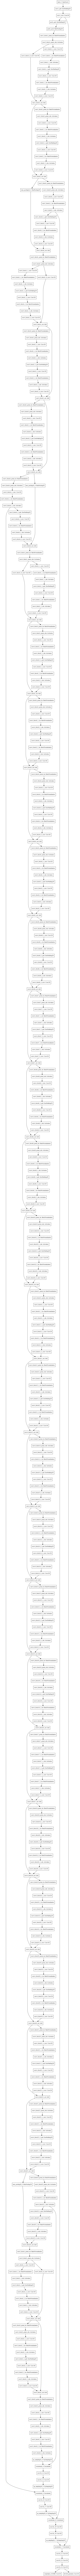

In [119]:
#Plot the model 
tf.keras.utils.plot_model(
    our_meteor_model, to_file='model.png', show_shapes=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

# **5. Testing the model on a give Batch of the dataset**

In [120]:
batch_test[0].shape #see the shape of the batch 

(10, 224, 224, 3)

## **a. Predict over the given batch**

In [121]:
our_meteor_model.predict(batch_test[0])  #how to predict over a given batch 

[array([[[[0.44586265],
          [0.39904493],
          [0.33231628],
          ...,
          [0.36362636],
          [0.4679013 ],
          [0.4626791 ]],
 
         [[0.54308903],
          [0.43280578],
          [0.43722042],
          ...,
          [0.4346577 ],
          [0.4883093 ],
          [0.42898923]],
 
         [[0.52992177],
          [0.3287621 ],
          [0.35880616],
          ...,
          [0.5260017 ],
          [0.5153168 ],
          [0.4931809 ]],
 
         ...,
 
         [[0.48176765],
          [0.48079535],
          [0.46142635],
          ...,
          [0.50280577],
          [0.521554  ],
          [0.52832013]],
 
         [[0.4673514 ],
          [0.4662224 ],
          [0.48001185],
          ...,
          [0.4933276 ],
          [0.5150041 ],
          [0.51565325]],
 
         [[0.47822   ],
          [0.47788936],
          [0.46875525],
          ...,
          [0.48884854],
          [0.492988  ],
          [0.4976567 ]]],
 
 
        [

In [122]:
len(our_meteor_model.predict(batch_test[0]))  #length of the output

2

In [123]:
prediction_test = our_meteor_model.predict(batch_test[0])

In [124]:
prediction_test[0].shape #shape of the first element

(10, 112, 112, 1)

In [125]:
prediction_test[1].shape #shape of the second element

(10, 112, 112, 4)

In [126]:
len(batch_test[1:])  #see the length 

2

## **b. Loss Functions: carefully specify (true, pred) in the good order**

In [137]:
def weighted_crossentropy(truemap, scoremap, eps = 1e-5):


  ''' this function calculates the weighted crossentropy for maps of shape=(n, 3, 3) '''
  #eps = 1e-1

  sommede_scoremap = tf.reduce_sum(scoremap, axis=[1, 2])  #sum over axis1  axis2
  sommede_truemap = tf.reduce_sum(truemap, axis=[1, 2])  #sum over axis1  axis2

  CARD_true_map = truemap.shape[1] * truemap.shape[2]   #compute the area of maps (number of elements)
  
  thebeta = 1-(sommede_truemap/CARD_true_map)


  #Y* * log(Y_hat)
  ystar_minus_log_yhat = truemap * tf.math.log(scoremap+eps)
  red_sum_of_ystar_minus_log_yhat = tf.reduce_sum(ystar_minus_log_yhat, axis=[1, 2])
  aver_red_sum_of_ystar_minus_log_yhat = tf.reduce_mean(red_sum_of_ystar_minus_log_yhat)

  #(1- Y*) * (1 - log(Y_hat))
  oneminusoneminusystar_minus_log_yhat = (1 - truemap) * (1 - tf.math.log(scoremap+eps))
  red_sum_of_oneminusoneminusystar_minus_log_yhat = tf.reduce_sum(oneminusoneminusystar_minus_log_yhat, axis=[1, 2])
  aver_red_sum_of_oneminusoneminusystar_minus_log_yhat = tf.reduce_mean(red_sum_of_oneminusoneminusystar_minus_log_yhat)

  #average over the batches
  mean_of_beta = tf.reduce_mean(thebeta)

  #apply the final step of the calculation of the formula
  loss_scoremap = -mean_of_beta * aver_red_sum_of_ystar_minus_log_yhat - (1-mean_of_beta) * aver_red_sum_of_oneminusoneminusystar_minus_log_yhat 

  #print(loss_scoremap)
  #print(thebeta)
  return loss_scoremap





def quad_norm(g_true, g_pred):
  ''' this function calculates the distance for maps of shape=(n, m, m, 4) '''

  nb_batch = g_true.shape[0]   #arrange according your case 
  diff = g_true - g_pred    #difference between true and pred
  square = tf.square(diff)  #compute the sqaure
  sumdiffsquare = tf.reduce_sum(square, axis=[1,2])  #sum over the faces
  sumdiffsquareaxis1 = tf.reduce_sum(sumdiffsquare, axis=1)/4    #sum over axis1 and average over 4
  averagesumdiffaxis1 = tf.reduce_mean(sumdiffsquareaxis1)    #average over the batches
  distance = tf.sqrt(averagesumdiffaxis1)   #take the squareroot  real distance
  loss_QUADgeo = distance

  return distance




def smooth_l1_loss(prediction_tensor, target_tensor, weights):
  '''This function compute the smooth_l1_loss'''
  
  n_q = tf.reshape(quad_norm(target_tensor), tf.shape(weights))
  diff = prediction_tensor - target_tensor
  abs_diff = tf.abs(diff)
  abs_diff_lt_1 = tf.less(abs_diff, 1)
  pixel_wise_smooth_l1norm = (tf.reduce_sum(
      tf.where(abs_diff_lt_1, 0.5 * tf.square(abs_diff), abs_diff - 0.5),
      axis=-1) / n_q) * weights
  return pixel_wise_smooth_l1norm


## **c. Dictionary of Losse functions and Loss weights**

In [138]:
#losses

losses = {
	"outputlayer_SCORE": weighted_crossentropy,
	"QUAD_geometry": quad_norm
}
lossWeights = {"outputlayer_SCORE": 1.0, "QUAD_geometry": 1.0}

## **d. Load the Optimizer (Adam in our case)**

In [139]:
#optimizer

optimizer_adam = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')

## **e. Compile the Model** 

In [140]:
our_meteor_model.compile(optimizer=optimizer_adam, loss=losses, loss_weights=lossWeights) #compilation

## **f. Fit the Model** 

In [141]:
our_meteor_model.fit(x=batch_test[0], y=(batch_test[1],batch_test[2])) #fitting the model 

1/1 [==============================] - 24s 24s/step - loss: 2431.3523 - outputlayer_SCORE_loss: -38.9241 - QUAD_geometry_loss: 2470.2764
